<a href="https://colab.research.google.com/github/samancha/computer-vision-masters/blob/main/mod2/Steve-Assignment-2.1-Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 2- CNN**

In [ ]:
# !pip install np-utils -q
# !pip list
!pip install tensorflow==2.12.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 114.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 45.3 MB/s eta 0:00:00


In [ ]:
import keras
import tensorflow as tf
import numpy as np
import keras.layers as layers
from keras.layers import MaxPooling2D
from keras.datasets import mnist, cifar10
from keras.models import Sequential as models
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import pathlib
from keras import utils
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from keras import backend as K

In [ ]:
# Create train and test dataset
# dowload from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print("images in test set: ", len(X_train))
print("labels: ", y_train )
print("Train / test shapes: ", X_train.shape, X_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
images in test set:  60000
labels:  [5 0 4 ... 5 6 8]
Train / test shapes:  (60000, 28, 28) (10000, 28, 28)


1.a. start with creating a visualization of your input data

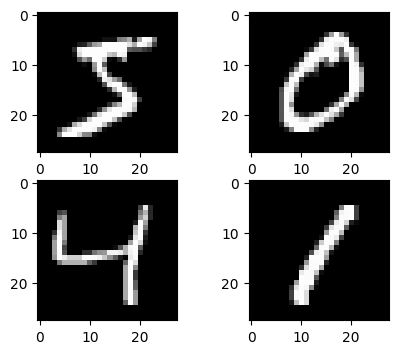

In [ ]:
#1.a. Create the visualization here
# Let's look into the dataset by visualizing some data opints

import cv2

plt.figure(figsize=(5, 4))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  resized = cv2.resize(X_train[i], (28, 28), cv2.INTER_AREA)
  title = 'Label is {label}'.format(label=y_train[i])
  plt.xticks()
  plt.yticks()
  plt.imshow(resized, cmap='gray')

plt.show()

In [ ]:
#preprocessing
# Kears allows us to add the number of channels either to the beggining of shape or the end of it
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print("format: ", str(K.image_data_format()))
print("Input shape: ", input_shape)

format:  channels_last
Input shape:  (28, 28, 1)


In [ ]:
# You need to apply some preprocessing on X and y
num_classes = 10

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# Encode outputs (Capital Y for one-hot matrix)
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes= num_classes)

# Few examples
for i in range(3):
  print("Label: " + str(y_train[i]) + " | One-hot:", Y_train[i])

Label: 5 | One-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Label: 0 | One-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label: 4 | One-hot: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


1.b. Create a CNN model with 4 convolution layers in which two of them have 32 and two of them have 64 filters. The fully connected layer has one hidden layer (512 nodes). Draw the Learning curve. What is your understanding from learning curve? Batch size=128 and epochs=20

In [ ]:
#1.b.
# Create model here
batch_size=128
epochs=20
IMAGE_SIZE = [28,28]

model = tf.keras.Sequential([
                              layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                              # layers.MaxPooling2D((2, 2)),
                              layers.Conv2D(32, (3, 3), activation='relu'),
                              layers.MaxPooling2D((2, 2)),
                              layers.Conv2D(64, (3, 3), activation='relu'),
                              layers.MaxPooling2D((2, 2)),
                              layers.Conv2D(64, (3, 3), activation='relu'),
                              layers.GlobalAveragePooling2D(),
                              layers.Dense(512, activation='relu'),
                              layers.Dense(10, activation='softmax')
                            ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 64)          3

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 16s 9ms/step - loss: 0.4058 - accuracy: 0.8691 - val_loss: 0.1097 - val_accuracy: 0.9655
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1054 - accuracy: 0.9672 - val_loss: 0.0611 - val_accuracy: 0.9798
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0720 - accuracy: 0.9782 - val_loss: 0.0599 - val_accuracy: 0.9797
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0551 - accuracy: 0.9830 - val_loss: 0.0390 - val_accuracy: 0.9876
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0433 - accuracy: 0.9864 - val_loss: 0.0346 - val_accuracy: 0.9889
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0516 - val_accuracy: 0.9834
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0292 - accuracy: 0.9909 - val_loss: 0.0363 - val_accuracy: 0.9882
Epoch

In [ ]:
# Measure test accuracy
scores = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

print("Accuracy: %.2f%%" % (scores[1]*100))
print("Val Accuracy: %.2f%%" % (val_acc[1]*100))
print("Loss: %.2f%%" % (loss[1]*100))
print("Val Loss: %.2f%%" % (val_loss[1]*100))

Accuracy: 96.72%
Val Accuracy: 97.98%
Loss: 10.54%
Val Loss: 6.11%


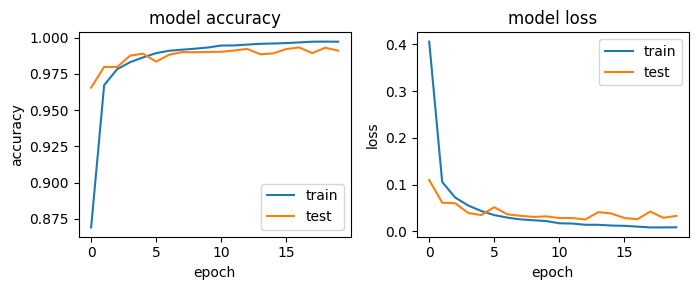

In [ ]:
# Draw Learning curve
def learning_curve(hist):
  #Create a function to draw learning curves
  # This will help you to just call this function in future for drawing the learning curves
  plt.figure(figsize=(7, 3))
  plt.subplot(1,2,1)
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='lower right')

  plt.subplot(1,2,2)
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.tight_layout()

learning_curve(hist)

The model looks fine. There is a some overfitting starting early on but nothing to be concerned about with an accuracy of .96 train and .98 test sets.

**Part 2- CIFAR10**

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
labels= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print(X_train.shape)
print(X_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


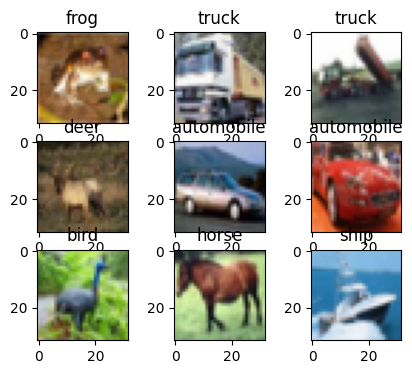

In [ ]:
# 2.a. Let's look into the dataset by visualizing some data opints

plt.figure(figsize=(5,4))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  label_index = y_train[i].tolist()[0]
  plt.title(labels[label_index])
  plt.xticks()
  plt.yticks()
  plt.imshow(X_train[i])

plt.show()

2.b. Apply the pre-processing algorithms that we discussed last week. The augmented images are supposed to be seared by 20%, zoomed by 20% and horizontally flipped. Now, design a CNN model with 4 convolution layers in which two of them have 32 and two of them have 64 filters. The fully connected layer has two hidden layers (512 and 256 nodes respectively). Draw the Learning curve. What is your understanding from learning curve?

In [ ]:
# 2.b
# Encoding output
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# create data generator
datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
# prepare iterator
x_train_resized = tf.image.resize(X_train, (28, 28))
it_train = datagen.flow(x_train_resized, Y_train, batch_size=128, shuffle=True)

# Create model here
model = tf.keras.Sequential([
                              layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                              layers.Conv2D(32, (3, 3), activation='relu'),
                              layers.MaxPooling2D((2, 2)),
                              layers.Conv2D(64, (3, 3), activation='relu'),
                              layers.Conv2D(64, (3, 3), activation='relu'),
                              layers.MaxPooling2D((2, 2)),
                              layers.Flatten(),
                              layers.Dense(512, activation='relu'),
                              layers.Dense(256, activation='relu'),
                              layers.Dense(10, activation='softmax')
                            ])

optimizer = SGD(learning_rate=0.005, decay=1e-6, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,  metrics=['accuracy'])
hist = model.fit(X_train, Y_train, batch_size=128, epochs=epochs, validation_data=(X_test, Y_test))

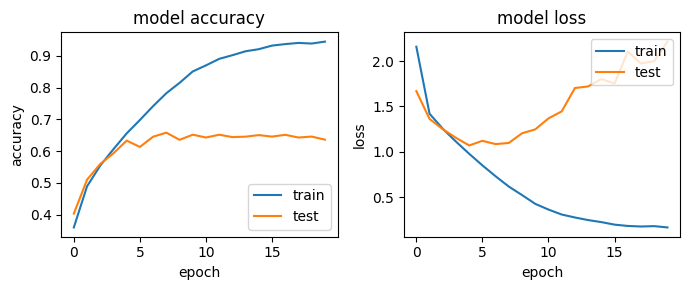

In [ ]:
# Draw learning curve here
learning_curve(hist)

In [ ]:
# What is the issue and possible solution for this learning curve?

The model is overfitting the training data. The model is memorizing the training examples instead of learning the underlying patterns. Thehe model fits the noise in the training data, but it doesn't generalize well to new, unseen examples.

Possible solutions include regularization techniques like dropout or L2 regularization to prevent the model from becoming too complex and overfitting.



In [ ]:
#2.c. Solution to resolve overfitting

# Create model here
model = tf.keras.Sequential([
                              layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                              layers.Conv2D(32, (3, 3), activation='relu'),
                              layers.MaxPooling2D((2, 2)),
                              layers.Conv2D(64, (3, 3), activation='relu'),
                              layers.Conv2D(64, (3, 3), activation='relu'),
                              layers.MaxPooling2D((2, 2)),
                              layers.Flatten(),
                              layers.Dense(512, activation='relu'),
                              layers.Dropout(0.5),
                              layers.Dense(256, activation='relu'),
                              layers.Dropout(0.5),
                              layers.Dense(10, activation='softmax')
                            ])

model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
hist = model.fit(X_train, Y_train, batch_size=128, epochs=epochs, validation_data=(X_test, Y_test))

Epoch 1/20
391/391 [==============================] - 9s 11ms/step - loss: 2.0210 - accuracy: 0.3073 - val_loss: 1.4274 - val_accuracy: 0.4681
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 1.4411 - accuracy: 0.4789 - val_loss: 1.2459 - val_accuracy: 0.5528
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 1.2387 - accuracy: 0.5629 - val_loss: 1.1061 - val_accuracy: 0.6102
Epoch 4/20
391/391 [==============================] - 4s 9ms/step - loss: 1.1005 - accuracy: 0.6124 - val_loss: 1.0165 - val_accuracy: 0.6439
Epoch 5/20
391/391 [==============================] - 4s 10ms/step - loss: 1.0031 - accuracy: 0.6493 - val_loss: 0.9688 - val_accuracy: 0.6685
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 0.9168 - accuracy: 0.6814 - val_loss: 0.9305 - val_accuracy: 0.6805
Epoch 7/20
391/391 [==============================] - 4s 9ms/step - loss: 0.8585 - accuracy: 0.7028 - val_loss: 0.9313 - val_accuracy: 0.6825
E

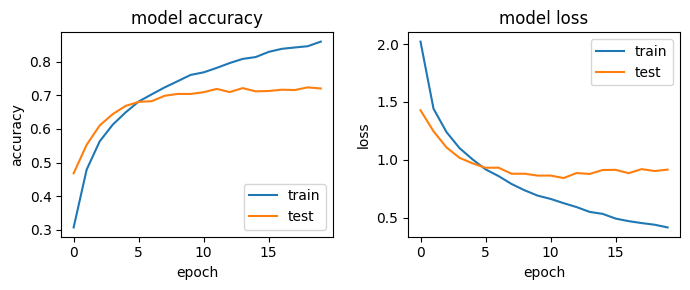

In [ ]:
# Draw learning curve
learning_curve(hist)

In [ ]:
# 2.d- This part is up to you to choose proper pre-trained model
# I chose VGG16 and RESNet50
# Implementing VGG16
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np

from keras.callbacks import ModelCheckpoint, EarlyStopping

vgg_model = VGG16(include_top=False,
                     weights='imagenet',
                     input_shape=(32, 32, 3))

vgg_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  trainable = True,
                  metrics=['accuracy'])   #Compile VGG16 model


checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(X_train, validation_data= X_test, epochs=20, callbacks=[checkpoint,early])

TypeError: ignored

In [ ]:
learning_curve(hist)

In [ ]:
vgg_model.evaluate(X_test, y_test, batch_size=256, verbose=1)

In [ ]:
# This ios my second pre-trained model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import GlobalAveragePooling2D

base_model = ResNet50()


# Let's train the model using RMSprop
model.compile
hist=

In [ ]:
learning_curve(hist)